## 탐색적 데이터 분석
Dataset: Kaggle 'Red Wine Quality'  
link: https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009?resource=download

### 0. 분석 목표 설정
와인의 품질(`quality`)에 영향을 주는 변수를 찾는다.  
<task>  
- 1. 데이터 준비하기
- 2. 데이터 탐색하기
- 3. 변수 탐색하기  
    v 각 변수의 분포 확인 - 히스토그램  
    v quality 변수와 각각의 변수의 관계를 시각화하기 - 박스플롯  
- 4. 상관관계 파악하기  
    v quality 변수와 상관관계가 있는 변수를 찾기 - 히트맵


### 1. 데이터 준비

In [2]:
# 필요한 패키지 import
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 데이터셋 불러오기
red_wine_df = pd.read_csv('data/winequality-red.csv')
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### 2. 데이터 파악하기
**fixed acidity** : 고정 산도 - 와인의 산도와 관련  
**volatile acidity** : 휘발성 산도 - 와인의 향과 관련  
**citric acid** : 시트르산(구연산) - 와인의 신선함 up  
**residual sugar** : 잔류 당분 - 와인의 단 맛 up  
**chlorides** : 염화물 - 와인의 짠 맛 up  
**free sulfur dioxide** : 황 화합물 - 와인 보존기관 up  
**total sulfur dioxide** : 총 이산화황  
**density** : 밀도 - 와인의 바디감  
**pH** : 7을 기준으로 낮으면 산성, 높으면 알칼리성  
**sulphates** : 황산염  
**alcohol**  
**quality** : 0~10, 높을수록 좋은 품질. 

* 출처: https://wikidocs.net/134603

quality 컬럼은 int, 나머지 컬럼은 float 자료형.  
row 개수: 1599개  
column 개수: 12개

In [3]:
# 수치형 데이터 통계치 확인
red_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# Null값 존재 여부 확인
red_wine_df.isna().sum()   # 모든 column의 결측치 없음.
    # Null값이 없으므로 처리 과정 생략

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

### 3. 변수 탐색

#### (1) 각 변수의 분포 확인하기 (히스토그램)

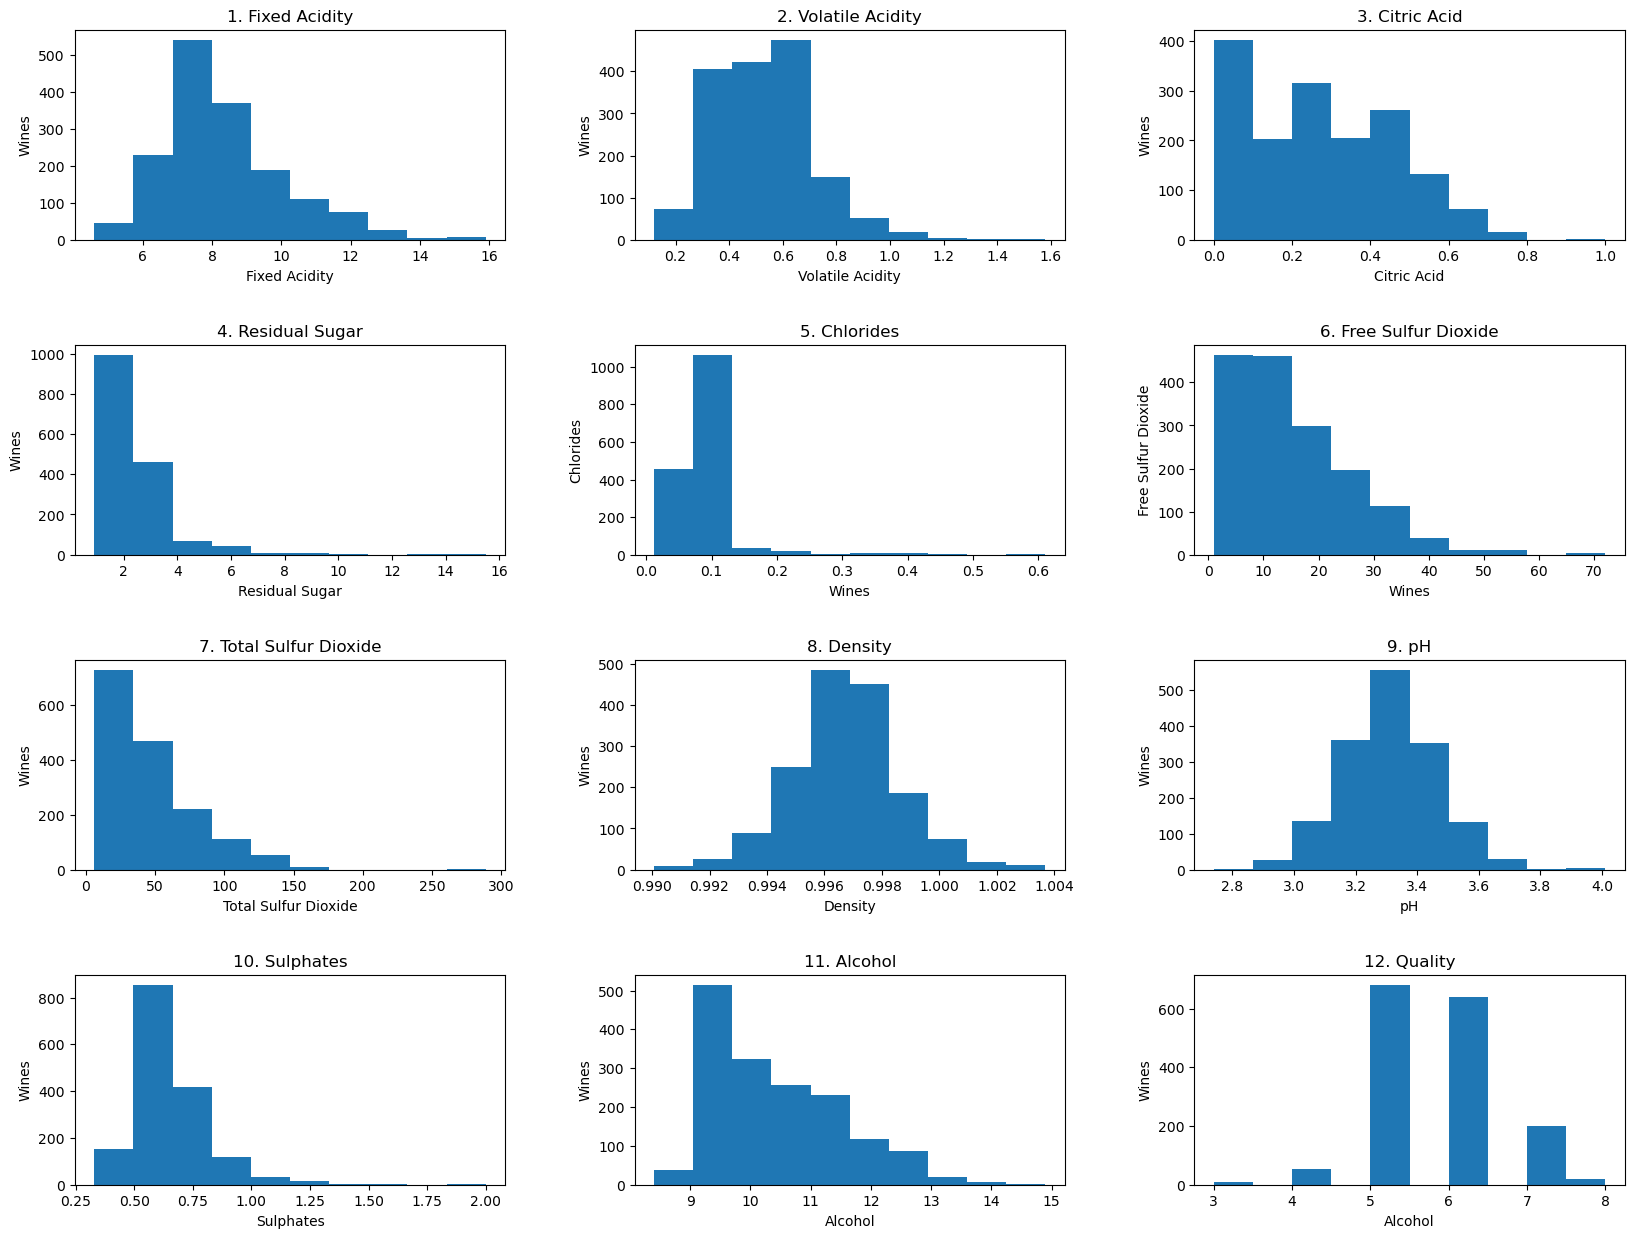

In [84]:
# 그래프 그리드 설정
f, axes = plt.subplots(4, 3)  # 4행 3열로 그래프 배치 - .subplot(nrows, ncols, figsize(x인치, y인치))
    # .subplots(행, 열)은 몇 개의 격자를 만들 것인지 설정하는 것.
    # f: figure 전체를 조절하는 변수
    # axes: 그래프 각각을 조절하는 변수
# 격자 크기 설정
f.set_size_inches((20, 15))
# 격자 여백 설정
plt.subplots_adjust(wspace=0.3, hspace=0.5)  # 가로 여백, 세로 여백

# axes변수를 활용해서 각 좌표에 인덱싱을 통해 그래프 그리기.
# 예시) axes[행, 열].hist~
# 이렇게 subplot을 그리지 않는 경우에는 제목/x레이블/y레이블 그릴 때
# plt.title(), plt.xlabel(), plt.ylabel()로 작성.

# 1. fixed acidity
axes[0,0].hist(red_wine_df['fixed acidity'])  # 히스토그램 그리기
axes[0,0].set_title("1. Fixed Acidity")  # 그래프 제목 
axes[0,0].set_xlabel('Fixed Acidity')  # 그래프 x축 레이블
axes[0,0].set_ylabel('Wines')  # 그래프 y축 레이블


# 2. volatile acidity
axes[0,1].hist(red_wine_df['volatile acidity'])
axes[0,1].set_title('2. Volatile Acidity')
axes[0,1].set_xlabel('Volatile Acidity')
axes[0,1].set_ylabel('Wines')

# 3. citric acid
axes[0,2].hist(red_wine_df['citric acid'])
axes[0,2].set_title('3. Citric Acid')
axes[0,2].set_xlabel('Citric Acid')
axes[0,2].set_ylabel('Wines')

# 4. residual sugar
axes[1,0].hist(red_wine_df['residual sugar'])
axes[1,0].set_title('4. Residual Sugar')
axes[1,0].set_xlabel('Residual Sugar')
axes[1,0].set_ylabel('Wines')

# 5. chlorides
axes[1,1].hist(red_wine_df['chlorides'])
axes[1,1].set_title('5. Chlorides')
axes[1,1].set_xlabel('Wines')
axes[1,1].set_ylabel('Chlorides')

# 6. free sulfur dioxide
axes[1,2].hist(red_wine_df['free sulfur dioxide'])
axes[1,2].set_title('6. Free Sulfur Dioxide')
axes[1,2].set_xlabel('Wines')
axes[1,2].set_ylabel('Free Sulfur Dioxide')

# 7. total sulfur dioxide
axes[2,0].hist(red_wine_df['total sulfur dioxide'])
axes[2,0].set_title('7. Total Sulfur Dioxide')
axes[2,0].set_xlabel('Total Sulfur Dioxide')
axes[2,0].set_ylabel('Wines')

# 8. density
axes[2,1].hist(red_wine_df['density'])
axes[2,1].set_title('8. Density')
axes[2,1].set_xlabel('Density')
axes[2,1].set_ylabel('Wines')

# 9. pH
axes[2,2].hist(red_wine_df['pH'])
axes[2,2].set_title('9. pH')
axes[2,2].set_xlabel('pH')
axes[2,2].set_ylabel('Wines')

# 10. sulphates
axes[3,0].hist(red_wine_df['sulphates'])
axes[3,0].set_title('10. Sulphates')
axes[3,0].set_xlabel('Sulphates')
axes[3,0].set_ylabel('Wines')

# 11. alcohol
axes[3,1].hist(red_wine_df['alcohol'])
axes[3,1].set_title('11. Alcohol')
axes[3,1].set_xlabel('Alcohol')
axes[3,1].set_ylabel('Wines')

# 12. quality
axes[3,2].hist(red_wine_df['quality'])
axes[3,2].set_title('12. Quality')
axes[3,2].set_xlabel('Alcohol')
axes[3,2].set_ylabel('Wines')

plt.show()

#### (2) quality 컬럼을 기준으로 관계 살펴보기 (박스플롯)
- quality 컬럼만 이산형 데이터이고, 나머지 컬럼들은 연속형 데이터이기 때문에 quality 컬럼을 x축으로 함.

In [78]:
# 각 품질 등급 별 데이터의 개수
red_wine_df['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\1121517467.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='fixed acidity', data=red_wine_df, palette='Set2')


상관계수: 0.1240516491132243


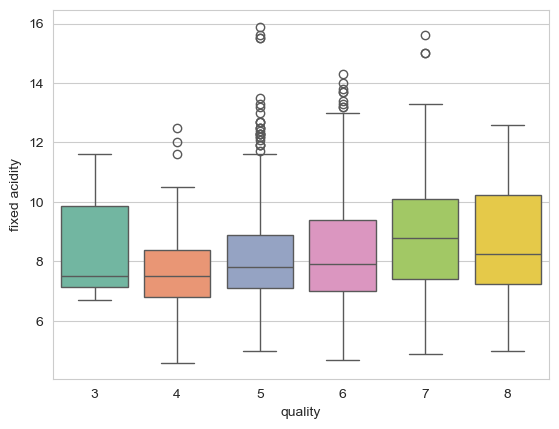

In [7]:
# 1. Fixed Acidity와 Quality
# 박스플롯 그리기
sns.set_style('whitegrid')  # 그래프 테마
sns.boxplot(x='quality', y='fixed acidity', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['fixed acidity'], red_wine_df['quality'])[0,1])

- quality가 7~8일 때를 제외하면, fixed acidity 8보다 낮거나 유사한 수치에 많이 분포함. (Q2가 8 주변에 위치)
- quality가 5일 때 가장 넓은 분포를 보임 - 5등급 정도의 와인에서는 fixed acidity가 고르지 못하게 분포한다.
- 데이터의 분포 정도를 봤을 때, fixed acidity는 quality와 일정한 상관관계를 보이지 않음.
- 상관계수 역시 약 0.1 정도로, 매우 낮은 상관관계를 띄고 있음.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\1966317241.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='volatile acidity', data=red_wine_df, palette='Set2')


상관계수: -0.39055778026400706


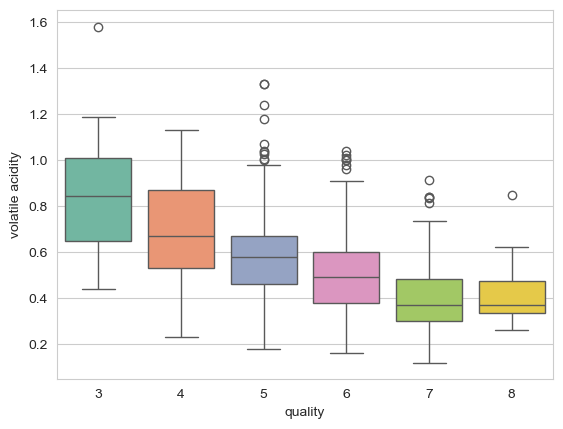

In [8]:
# 2. Volatile Acidity와 Quality
# 박스플롯 그리기
sns.set_style('whitegrid')  # 그래프 테마
sns.boxplot(x='quality', y='volatile acidity', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['volatile acidity'], red_wine_df['quality'])[0,1])

- quality가 3일 때 volatile acidity는 0.8에 많이 분포해 있고, 이상치는 1개 발견됨.
- quality가 5일 때 이상치의 분포가 넓은 것으로 보아, 해당 등급의 와인에서는 volatile acidity가  
항상 일정하지는 않은 것으로 보임.
- 중앙값(Q2)의 분포 경향을 볼 때, quality가 높아질수록 volatile acidity는 감소하는 것이 발견됨.
- 상관계수는 약 -0.4로, 높지는 않으나 약한 음의 상관관계를 띄고 있음.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\1042086546.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='citric acid', data=red_wine_df, palette='Set2')


상관계수: 0.22637251431804128


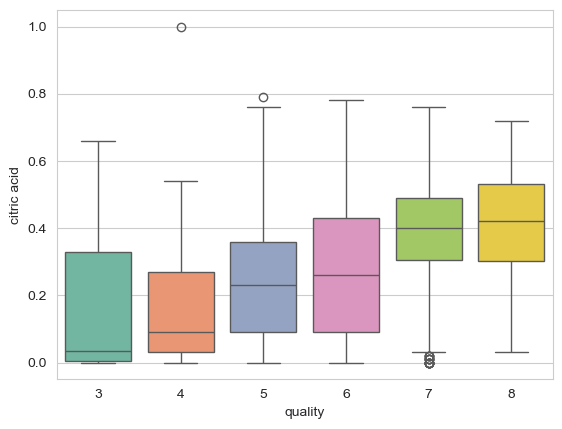

In [9]:
# 3. Citric Acid와 Quality
# 박스플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='citric acid', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['citric acid'], red_wine_df['quality'])[0,1])

- quality가 3일 때 citric acidity는 약 0.0에 많이 분포해 있다.
- 중앙값(Q2)의 분포 경향을 볼 때, quality가 높아질수록 citric acidity는 감소하는 것이 발견됨.
- 상관계수는 약 0.2로, 약한 양의 상관계수를 띄고 있음.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\1132547961.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='residual sugar', data=red_wine_df, palette='Set2')


상관계수: 0.013731637340066277


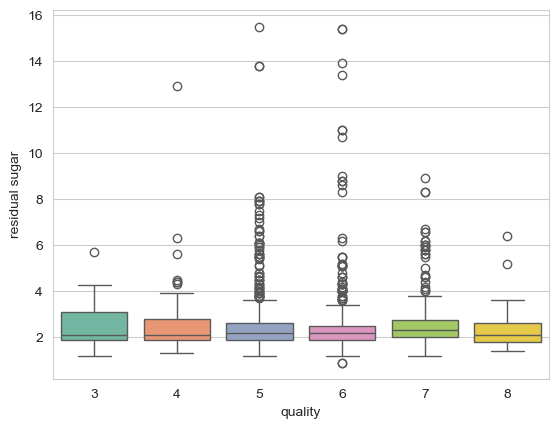

In [11]:
# 4. Residual Sugar와 Quality
# 박스플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='residual sugar', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['residual sugar'], red_wine_df['quality'])[0,1])

- residual sugar의 중앙값(Q2) 분포가 quality에 따라 크게 변화하지 않음.
- 또한, 모든 등급에서 이상치가 다수 발생함.
- 위와 같은 점에서 residual sugar와 quality는 일정한 선형적 상관관계를 갖고 있지 않음.
- 상관계수는 0.01로, 상관관계가 거의 없다고 볼 수 있음.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\2881746587.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='chlorides', data=red_wine_df, palette='Set2')


상관계수: -0.12890655993005265


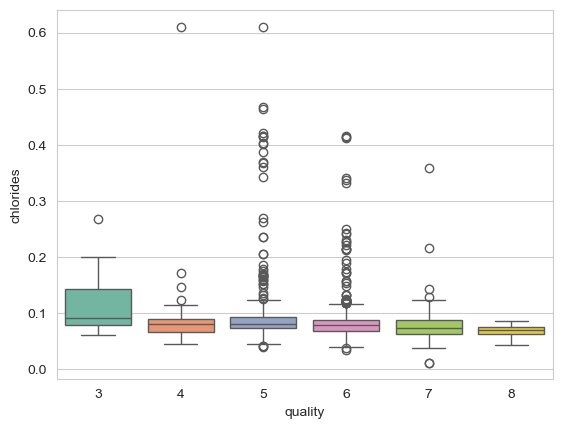

In [12]:
# 5. Chlorides와 Quality
# 박스플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='chlorides', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['chlorides'], red_wine_df['quality'])[0,1])

- quality가 5일 때, 이상치가 다수 발생하고 그 분포가 높은 것으로 보아, 5등급의 와인에서 chlorides가  
경향성을 가지고 있다고 보기 어렵다.
- 중앙값(Q2)의 분포 경향과 이상치의 분포를 볼 때, chlorides는 quality와 선형적 상관관계가 희박한 것으로 보인다.
- 상관계수 역시 약 -0.1로, 상관관계가 매우 희박하다.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\873824217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='free sulfur dioxide', data=red_wine_df, palette='Set2')


상관계수: -0.050656057244276326


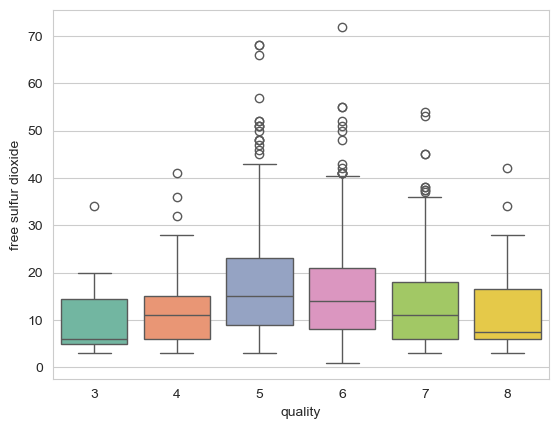

In [13]:
# 6. Free Sulfur Dioxide와 Quality
# 박스 플롯 그리기기
sns.set_style('whitegrid') 
sns.boxplot(x='quality', y='free sulfur dioxide', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['free sulfur dioxide'], red_wine_df['quality'])[0,1])

- quality가 5~7인 구간에서 이상치가 다수 발견된다.
- 중앙값(Q2)의 분포로 볼 때 free sulfur dioxide와 quality는 선형적 상관관계는 희박하지만,  
비선형적 상관관계는 가지고 있을 수 있다.
- 상관계수가 약 -0.05로 선형적 상관관계는 거의 없다고 볼 수 있다.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\1262628359.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='total sulfur dioxide', data=red_wine_df, palette='Set2')


상관계수: -0.18510028892653776


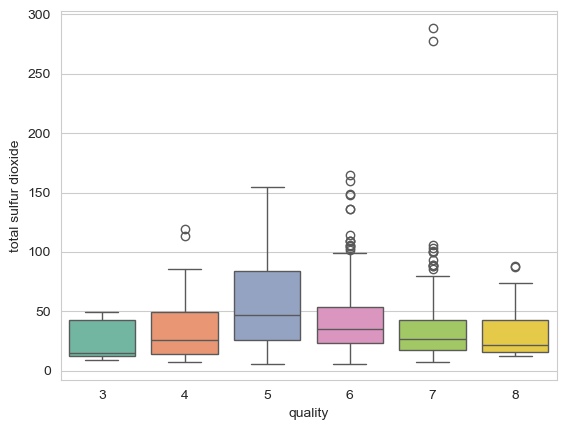

In [14]:
# 7. Total Sulfur Dioxide와 quality
# 박스 플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='total sulfur dioxide', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['total sulfur dioxide'], red_wine_df['quality'])[0,1])

- quality가 6~7인 구간에서 이상치가 다수 발견된다.
- 중앙값(Q2)의 분포로 볼 때 free sulfur dioxide와 마찬가지로 선형적 상관관계는 희박하지만,  
비선형적 상관관계는 가지고 있을 수 있다.
- 상관계수가 약 -0.1로 선형적 상관관계는 희박하다.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\1379071070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='density', data=red_wine_df, palette='Set2')


상관계수: -0.17491922778334873


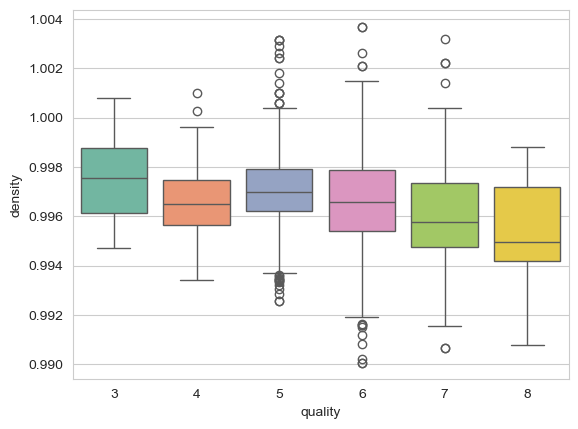

In [ ]:
# 8. Density와 Quality
# 박스 플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='density', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['density'], red_wine_df['quality'])[0,1])

- quality가 5~6인 구간에서 이상치가 다수 발견된다. 해당 등급일 때 density가 일정하지 않은 것으로 보인다.
- 상관계수는 약 -0.2로, 음의 상관관계를 가지고 있으나 그 정도가 희박하다고 볼 수 있다.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\349447167.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='pH', data=red_wine_df, palette='Set2')


상관계수: -0.05773139120538215


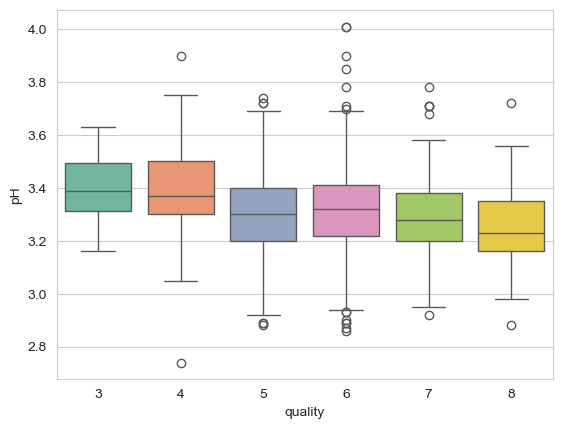

In [16]:
# 9. pH와 Quality
# 박스 플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='pH', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['pH'], red_wine_df['quality'])[0,1])

- 중앙값(Q2)의 분포를 볼 때, quality가 높아짐에 따라 pH가 일정한 경향성을 보이지 않으므로,  
두 변수 간의 선형적 상관관계가 있다고 판단하기 어렵다.
- 상관계수 역시 약 -0.06 정도로, 두 변수의 상관성이 매우 희박하다.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\4273816930.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='sulphates', data=red_wine_df, palette='Set2')


상관계수: 0.2513970790692613


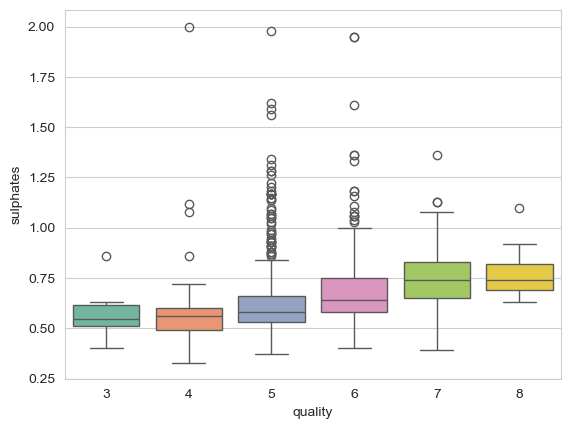

In [17]:
# 10. Sulphates와 Quality
# 박스 플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='sulphates', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['sulphates'], red_wine_df['quality'])[0,1])

- 중앙값(Q2)의 경향성을 볼 때, quality가 높아짐에 따라 sulphates가 주로 분포한 정도 역시 소폭 증가한다.
- quality가 5일 때 이상치가 다수 발견되고 그 분포가 넓은 점을 보아,  
해당 등급에서는 sulphates의 수치가 일정하지 않은 것으로 보인다.
- 상관계수는 약 0.3으로, 약한 양의 상관관계를 보인다.

C:\Users\emma1\AppData\Local\Temp\ipykernel_3080\975325205.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='quality', y='alcohol', data=red_wine_df, palette='Set2')


상관계수: 0.4761663240011359


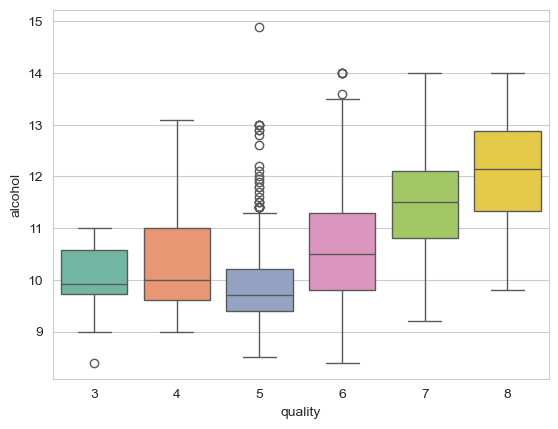

In [18]:
# 11. Alcohol과 Quality
# 박스플롯 그리기
sns.set_style('whitegrid')
sns.boxplot(x='quality', y='alcohol', data=red_wine_df, palette='Set2')

# 상관계수 구하기
print('상관계수:', np.corrcoef(red_wine_df['alcohol'], red_wine_df['quality'])[0,1])

- 상관계수가 약 0.5로, quality와 alcohol은 양의 상관관계가 있다.

### 4. 상관관계 파악하기

In [ ]:
# 히트맵 그리기
